# Лабораторная работа 3

Перед выполнением лабораторной работы необходимо загрузить набор данных в соответствии с вариантом на диск

<ol>
    <li>Написать программу, которая разделяет исходную выборку на обучающую и тестовую (training set, test set). Использовать стандартные функции (train_test_split и др. нельзя).</li>
<li>С использованием библиотеки scikit-learn обучить модель линейной регрессии по обучающей выборке пример
<li>Проверить точность модели по тестовой выборке</li>
<li>Построить модель с использованием полиномиальной функции пример. Построить графики зависимости точности на обучающей и тестовой выборке от степени полиномиальной функции.</li>
<li>Построить модель с использованием регуляризации пример. На основе экспериментов подобрать параметры для регуляризации.</li>
<li>Построить графики зависимости точности модели на обучающей и тестовой выборках от коэффициента регуляризации.</li></ol>

## Задание 1

In [1]:
def train_test_split(x, y, train_part=0.7):
    train_size = int(x.shape[0]*train_part)
    
    return x[:train_size], y[:train_size], x[train_size:], y[train_size]

## Задание 2

In [2]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import pandas as pd

In [3]:
df_train = pd.read_csv('UJIndoorLoc/trainingData.csv')
df_test = pd.read_csv('UJIndoorLoc/validationData.csv')

x_train = df_train.values.T[:520].T[:,:20]
y_train = df_train.values.T[[520, 521, 522, 523], :].T[:,:1]
x_test = df_test.values.T[:520].T[:,:20]
y_test = df_test.values.T[[520, 521, 522, 523], :].T[:,:1]

y_train.shape

(19937, 1)

In [4]:
x_train_scaler = StandardScaler()
x_train = x_train_scaler.fit_transform(x_train)

y_train_scaler = StandardScaler()
y_train = y_train_scaler.fit_transform(y_train)

In [5]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Задание 3

In [6]:
x_test_scaler = StandardScaler()
x_test = x_test_scaler.fit_transform(x_test)

y_test_scaler = StandardScaler()
y_test = y_test_scaler.fit_transform(y_test)

In [7]:
y_pred_reg = reg.predict(x_test)

print('MSE:', mean_squared_error(y_pred_reg, y_test))
print('R2:', r2_score(y_pred_reg, y_test))

MSE: 0.688700399554
R2: -1.2169194497


## Задание 4

In [8]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

In [9]:
degrees = range(1,6)
r2s_test_poly = []
r2s_train_poly = []

for degree in degrees:
    poly = make_pipeline(PolynomialFeatures(degree), Ridge())
    poly.fit(x_train, y_train)
    
    y_pred_poly_test = poly.predict(x_test)
    r2_test = r2_score(y_pred_poly_test, y_test)
    r2s_test_poly.append(r2_test)

    y_pred_poly_train = poly.predict(x_train)
    r2_train = r2_score(y_pred_poly_train, y_train)
    r2s_train_poly.append(r2_train)

    print('Poly degree:', degree)
    print('\tMSE (test):', mean_squared_error(y_pred_poly_test, y_test))
    print('\tR2: (test)', r2_test)

    print('\tMSE (train):', mean_squared_error(y_pred_poly_train, y_train))
    print('\tR2: (train)', r2_train)


Poly degree: 1
	MSE (test): 0.688699082841
	R2: (test) -1.21701324616
	MSE (train): 0.605641124518
	R2: (train) -0.535831272236
Poly degree: 2
	MSE (test): 0.746857993855
	R2: (test) -0.558875878397
	MSE (train): 0.562034433512
	R2: (train) -0.283513661605
Poly degree: 3
	MSE (test): 0.82589637533
	R2: (test) -1.60503077192
	MSE (train): 0.55641956274
	R2: (train) -0.254636534713
Poly degree: 4
	MSE (test): 4.05803561252
	R2: (test) -0.252216988519
	MSE (train): 0.556109139964
	R2: (train) -0.252950767702


C:\ProgramData\Anaconda3\envs\keras\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.2586771789188303e-21
  ' condition number: {}'.format(rcond), RuntimeWarning)


Poly degree: 5
	MSE (test): 377082.216625
	R2: (test) -0.00344527863467
	MSE (train): 103.652709285
	R2: (train) 0.0176059712816


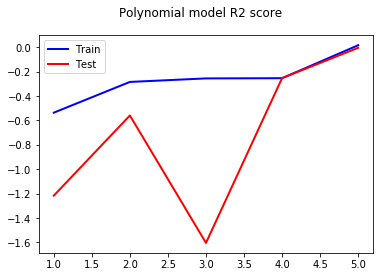

In [10]:
plt.plot(degrees, r2s_train_poly, color='blue', linewidth=2, label='Train')
plt.plot(degrees, r2s_test_poly, color='red', linewidth=2, label='Test')
plt.suptitle('Polynomial model R2 score')
plt.legend()


## Задание 5

In [11]:
from sklearn.linear_model import Lasso, ElasticNet, Ridge

In [12]:
alphas = pd.np.logspace(-4, 3, 20)
r2s_test_lasso = []
r2s_train_lasso = []

for alpha in alphas:
    lasso = ElasticNet(alpha, 0)
    lasso.fit(x_train, y_train)
    
    y_pred_lasso_test = lasso.predict(x_test)
    r2_test = r2_score(y_pred_lasso_test, y_test)
    r2s_test_lasso.append(r2_test)

    y_pred_lasso_train = lasso.predict(x_train)
    r2_train = r2_score(y_pred_lasso_train, y_train)
    r2s_train_lasso.append(r2_train)
    
    print('Alpha:', alpha)
    print('\tMSE (test):', mean_squared_error(y_pred_lasso_test, y_test))
    print('\tR2: (test)', r2_test)

    print('\tMSE (train):', mean_squared_error(y_pred_lasso_train, y_train))
    print('\tR2: (train)', r2_train)

C:\ProgramData\Anaconda3\envs\keras\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Alpha: 0.0001
	MSE (test): 0.688697775255
	R2: (test) -1.21710645467
	MSE (train): 0.605641125394
	R2: (train) -0.535900742894
Alpha: 0.000233572146909
	MSE (test): 0.68869427512
	R2: (test) -1.2173562598
	MSE (train): 0.605641130601
	R2: (train) -0.53608692288
Alpha: 0.000545559478117
	MSE (test): 0.688686122887
	R2: (test) -1.21793981765
	MSE (train): 0.605641158977
	R2: (train) -0.536521814685
Alpha: 0.0012742749857
	MSE (test): 0.688667206967
	R2: (test) -1.21930329623
	MSE (train): 0.605641313325
	R2: (train) -0.53753775032
Alpha: 0.00297635144163
	MSE (test): 0.688623701116
	R2: (test) -1.22249044626
	MSE (train): 0.60564214962
	R2: (train) -0.539911521631
Alpha: 0.00695192796178
	MSE (test): 0.68852567882
	R2: (test) -1.22994793653
	MSE (train): 0.605646641707
	R2: (train) -0.545460668815
Alpha: 0.0162377673919
	MSE (test): 0.68831524104
	R2: (test) -1.24743692103
	MSE (train): 0.605670330625
	R2: (train) -0.558449265805
Alpha: 0.0379269019073
	MSE (test): 0.687913384244
	R2: (t

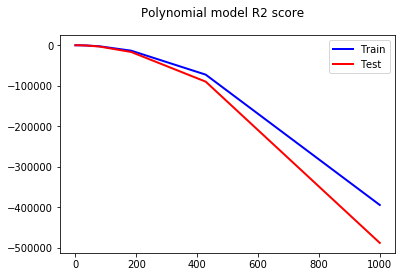

In [13]:
plt.plot(alphas, r2s_train_lasso, color='blue', linewidth=2, label='Train')
plt.plot(alphas, r2s_test_lasso, color='red', linewidth=2, label='Test')
plt.suptitle('Polynomial model R2 score')
plt.legend()